In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

### import mnist dataset 28 x 28 pixel images

In [2]:
mnist = fetch_openml('mnist_784', version = 1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
len(mnist.data)

70000

### seperation of training and test set before exploration

In [5]:
X, y = mnist["data"], mnist["target"]

y = y.astype(np.uint8)

print(X.shape, y.shape)

(70000, 784) (70000,)


In [6]:
x_train, y_train = X[:60000], y[:60000]
x_test, y_test = X[60000:], y[:60000]

In [7]:
x_train.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y_train.head(5)

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: uint8

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt


### plot the first image in the dataset set

Text(0.5, 1.0, 'First Dig in Dataset: 5')

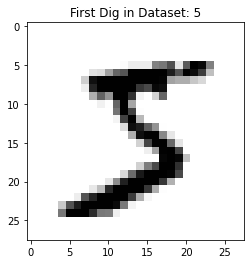

In [11]:
first_dig = X.values[:1]

fig, axs = plt.subplots()
axs.imshow(first_dig.reshape(28, 28), cmap="binary")
axs.set_title("First Dig in Dataset: " +  str(y.iloc[0]))


### start of with basic (OVR) binary classifier

##### Stochastic Gradient Descent Classifier

In [12]:
from sklearn.linear_model import SGDClassifier

# OVR -> only 5's

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict(first_dig)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

#### model performance evaluation

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

##### 95% accuracy isn't too bad, but it's a OVR classifier => accuracy isn't a good measure for model performance

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

confusion_matrix(y_train_pred, y_train_5)

array([[53892,  1891],
       [  687,  3530]], dtype=int64)

##### consider precision/recall and the Receiver Operating Characteristic curve

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [20]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

#### creating a model with a preferred precision / recall (SGDClassifier decision function))

In [21]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method='decision_function')

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

(-30000.0, 30000.0)

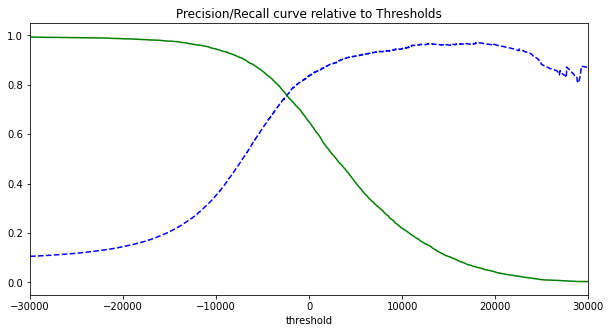

In [54]:
fig, axs = plt.subplots(figsize=(10, 5))
axs.plot(thresholds, precisions[:-1], 'b--', label='precision')
axs.plot(thresholds, recalls[:-1], 'g-', label='recall')

axs.set_xlabel('threshold')
axs.set_title('Precision/Recall curve relative to Thresholds')
axs.set_xlim([-30000, 30000])

Text(0, 0.5, 'Precision')

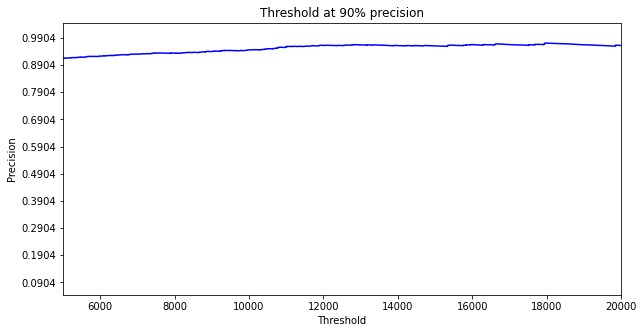

In [48]:
fig, axs = plt.subplots(figsize=(10, 5))
axs.plot(thresholds, precisions[:-1], 'b-', label='precision')
axs.set_xlim([5000, 20000])
axs.set_yticks(np.arange(min(precisions[:-1]), max(precisions[:-1]), 0.1))

axs.set_title('Threshold at 90% precision')
axs.set_xlabel('Threshold')
axs.set_ylabel('Precision')

Text(0.5, 1.0, 'Precision vs Recall')

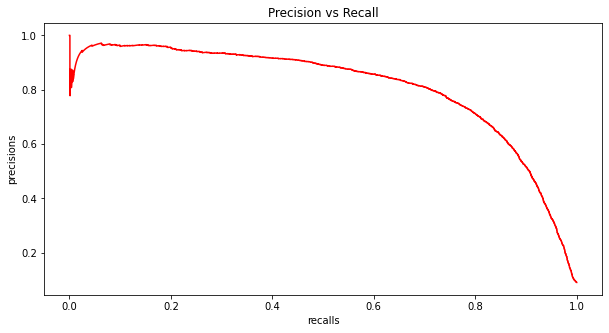

In [55]:
fig, axs = plt.subplots(figsize=(10, 5))
axs.plot(recalls, precisions, 'r-')
axs.set_xlabel('recalls')
axs.set_ylabel('precisions')
axs.set_title('Precision vs Recall')


In [50]:
precision90_thresholdval = thresholds[np.argmax(precisions >= 0.9)]
precision90_thresholdval

3370.019499143958

In [51]:
y_train_pred90 = (y_scores >= precision90_thresholdval)

precision_score(y_train_5, y_train_pred90)

0.9000345901072293

##### 90% precision classifier but with low recall 

In [52]:
recall_score(y_train_5, y_train_pred90)

0.4799852425751706

##### a Look at the ROC curve

In [56]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Text(0.5, 1.0, 'ROC Curve')

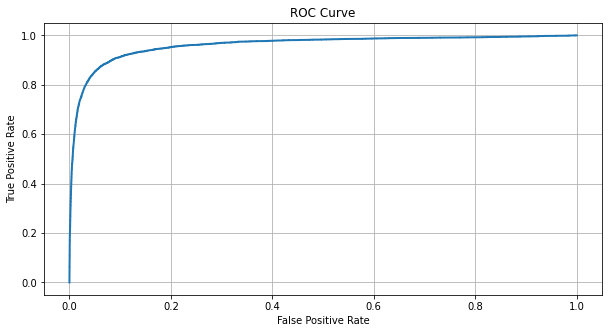

In [57]:
fig, axs = plt.subplots(figsize=(10,5))
axs.plot(fpr, tpr, linewidth=2)
axs.set_xlabel('False Positive Rate')
axs.set_ylabel('True Positive Rate')
axs.grid(True)
axs.set_title('ROC Curve')

In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### Multiclass classification

In [59]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train, y_train)
svm_clf.predict(first_dig)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [69]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [61]:
ovr_clf.predict(first_dig)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted w

array([5], dtype=uint8)

In [70]:
ovr_clf.predict(x_test[:1])

array([7], dtype=uint8)

In [71]:
y_test[:1]

0    5
Name: class, dtype: uint8